<a href="https://colab.research.google.com/github/ranjanguddu/Machine-Learning/blob/master/EVA4/Session-12/Assignment-12A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# let's mount our google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/Assignment-12/')
! ls -l

total 18
-rw------- 1 root root 1446 Apr 17 20:48 Albumentation_Process.py
-rw------- 1 root root 1315 Apr 17 19:56 Asgmnt_12_DataGenerator.py
-rw------- 1 root root  564 Apr 17 19:59 DataLoaders.py
-rw------- 1 root root  529 Apr 17 19:59 Denorm.py
-rw------- 1 root root  783 Apr 17 19:59 Display.py
drwx------ 2 root root 4096 Apr 17 20:03 models
drwx------ 2 root root 4096 Apr 17 20:07 __pycache__
drwx------ 2 root root 4096 Apr 17 19:52 tiny-imagenet-200


In [0]:
! pip install scipy==1.1.0

In [0]:
import zipfile
import requests

from io import StringIO, BytesIO
def download_images(url):
  if(os.path.isdir("tiny-imagenet-200.zip")):
    print("Images already downloaded")
    return

  r = requests.get(url, stream=True)
  print('Downloading the dataset through ' +url)

  zip_ref = zipfile.ZipFile(BytesIO(r.content))
  zip_ref.extractall('./')
  zip_ref.close()

In [9]:
url = "http://cs231n.stanford.edu/tiny-imagenet-200.zip"
download_images(url)

In [0]:
import time

import numpy as np
from torchvision import datasets, transforms
import torch

import matplotlib.pyplot as plt
from matplotlib import pyplot


import torchvision
import torch.nn as nn
import torch.optim as optim

In [0]:
import os
os.chdir('/content/drive/My Drive/SavedModels/tiny-imagenet-200/train/')
! ls -l

In [7]:
import time
import scipy.ndimage as nd
from skimage import io
import numpy as np

path = '/content/drive/My Drive/SavedModels/tiny-imagenet-200/'

def get_id_dictionary():
    id_dict = {}
    for i, line in enumerate(open( path + 'wnids.txt', 'r')):
        id_dict[line.replace('\n', '')] = i
    return id_dict
  
def get_class_to_id_dict():
    id_dict = get_id_dictionary()
    all_classes = {}
    result = {}
    for i, line in enumerate(open( path + 'words.txt', 'r')):
        n_id, word = line.split('\t')[:2]
        all_classes[n_id] = word
    for key, value in id_dict.items():
        result[value] = (key, all_classes[key])      
    return result

def get_data(id_dict):
    print('starting loading data')
    train_data, test_data = [], []
    train_labels, test_labels = [], []
    t = time.time()
    for key, value in id_dict.items():
        train_data += [nd.imread( path + 'train/{}/images/{}_{}.JPEG'.format(key, key, str(i)), mode='RGB') for i in range(500)]
        train_labels_ = np.array([[0]*200]*500)
        train_labels_[:, value] = 1
        train_labels += train_labels_.tolist()

    for line in open( path + 'val/val_annotations.txt'):
        img_name, class_id = line.split('\t')[:2]
        test_data.append(nd.imread( path + 'val/images/{}'.format(img_name) ,mode='RGB'))
        test_labels_ = np.array([[0]*200])
        test_labels_[0, id_dict[class_id]] = 1
        test_labels += test_labels_.tolist()

    print('finished loading data, in {} seconds'.format(time.time() - t))
    return np.array(train_data), np.array(train_labels), np.array(test_data), np.array(test_labels)
  
train_data, train_labels, test_data, test_labels = get_data(get_id_dictionary())

print( "train data shape: ",  train_data.shape )
print( "train label shape: ", train_labels.shape )
print( "test data shape: ",   test_data.shape )
print( "test_labels.shape: ", test_labels.shape )

starting loading data


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


finished loading data, in 142.2424898147583 seconds
train data shape:  (100000, 64, 64, 3)
train label shape:  (100000, 200)
test data shape:  (10000, 64, 64, 3)
test_labels.shape:  (10000, 200)


In [0]:
mean,std = (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)
norm_mean_std=[mean,std]

In [9]:
data = np.concatenate((train_data,test_data))
labels = np.concatenate((train_labels,test_labels))

n =10000
#print(labels[n])
labels= np.argmax(labels, axis=1)
#print(label[n])

print(labels.shape)
print(data.shape)


(110000,)
(110000, 64, 64, 3)


In [10]:
def shuffle_data(data, labels ):
    size = len(data)
    train_idx = np.arange(size)
    np.random.shuffle(train_idx)

    return data[train_idx], labels[train_idx]
  
data, labels = shuffle_data(data, labels)

print(labels.shape)
print(data.shape)

(110000,)
(110000, 64, 64, 3)


In [11]:
from Albumentation_Process import Albumentations
train_transforms = Albumentations(norm_mean_std,Rotate=(-60.0,60.0),H_F=True, V_F = True,Resize=None,R_Crop=None, cutout=(4,))
test_transforms = Albumentations(norm_mean_std)

in the init of Albumentation
Finally Append become:[<albumentations.augmentations.transforms.Rotate object at 0x7fa96d74b6d8>, <albumentations.augmentations.transforms.HorizontalFlip object at 0x7fa96d74b438>, <albumentations.augmentations.transforms.VerticalFlip object at 0x7fa96d74b3c8>, <albumentations.augmentations.transforms.Normalize object at 0x7fa96d74b7b8>, <albumentations.augmentations.transforms.Cutout object at 0x7fa96d74b710>, <albumentations.pytorch.transforms.ToTensor object at 0x7fa96d74b240>]
in the init of Albumentation
Finally Append become:[<albumentations.augmentations.transforms.Normalize object at 0x7fa96d74b7f0>, <albumentations.pytorch.transforms.ToTensor object at 0x7fa96d74b940>]


In [16]:
from Asgmnt_12_DataGenerator import TinyImageNet

training_data = TinyImageNet(data[0:77000, :], labels[0:77000],type_data="train", transform=train_transforms)
testing_data = TinyImageNet(data[77000:110000, :], labels[77000:110000], type_data="test", transform=test_transforms)

Train Data Image Shape:(77000, 64, 64, 3)
Train Label Label Shape:(77000,)
Test Data Image Shape:(33000, 64, 64, 3)
Test Data Label Shape:(33000,)


In [0]:
import DataLoaders
loader = DataLoaders.DataLoader(batch_size=512)

# train dataloader
train_loader = loader.load(training_data)

# test dataloader
test_loader = loader.load(testing_data)

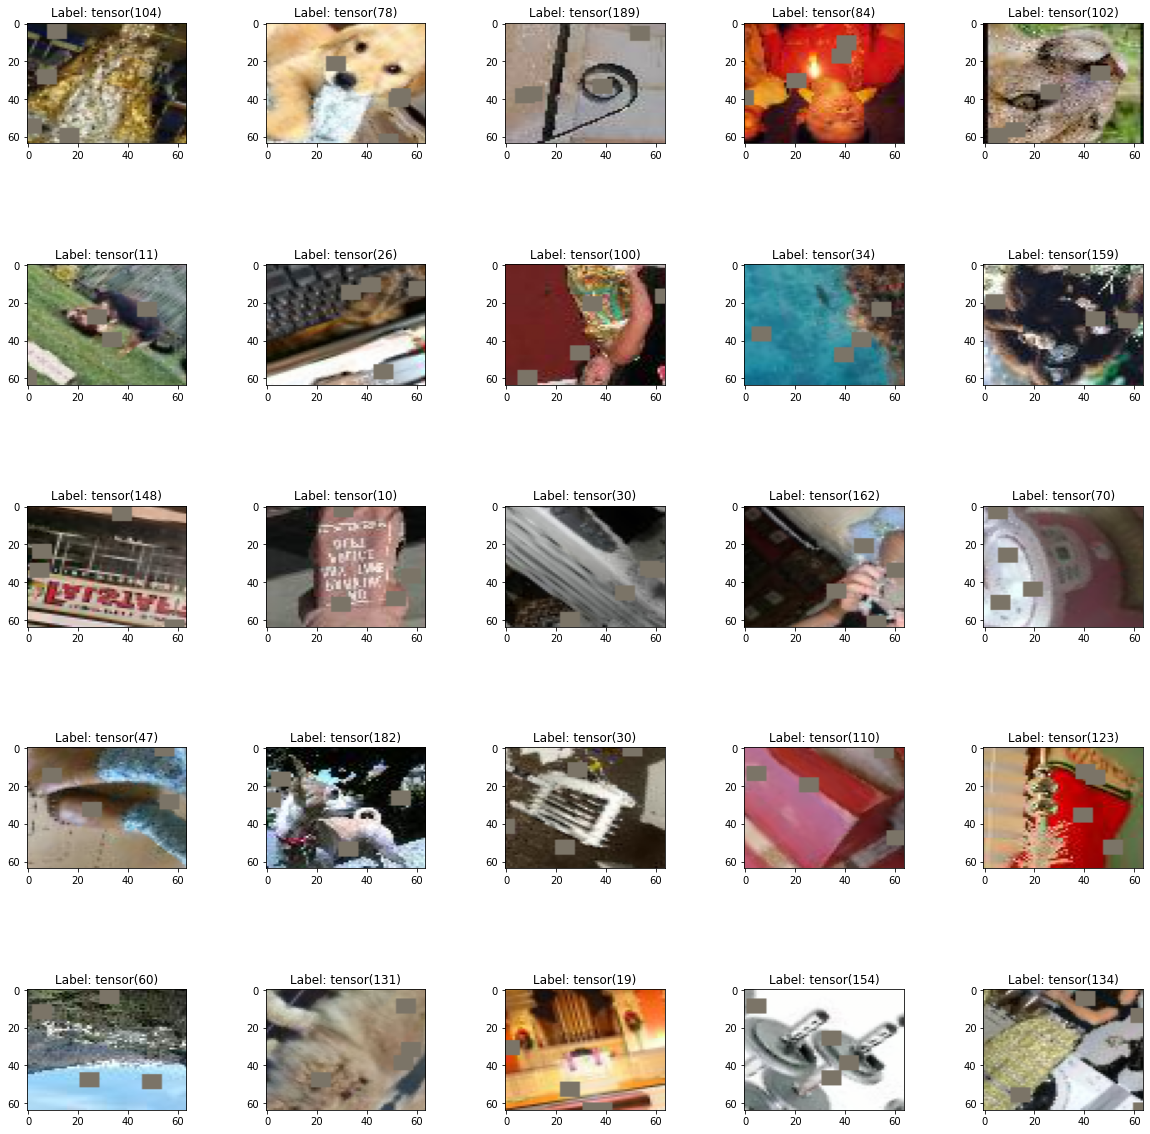

In [25]:
from Display import Display_Sample_Image

Display_Sample_Image(mean, std, train_loader)


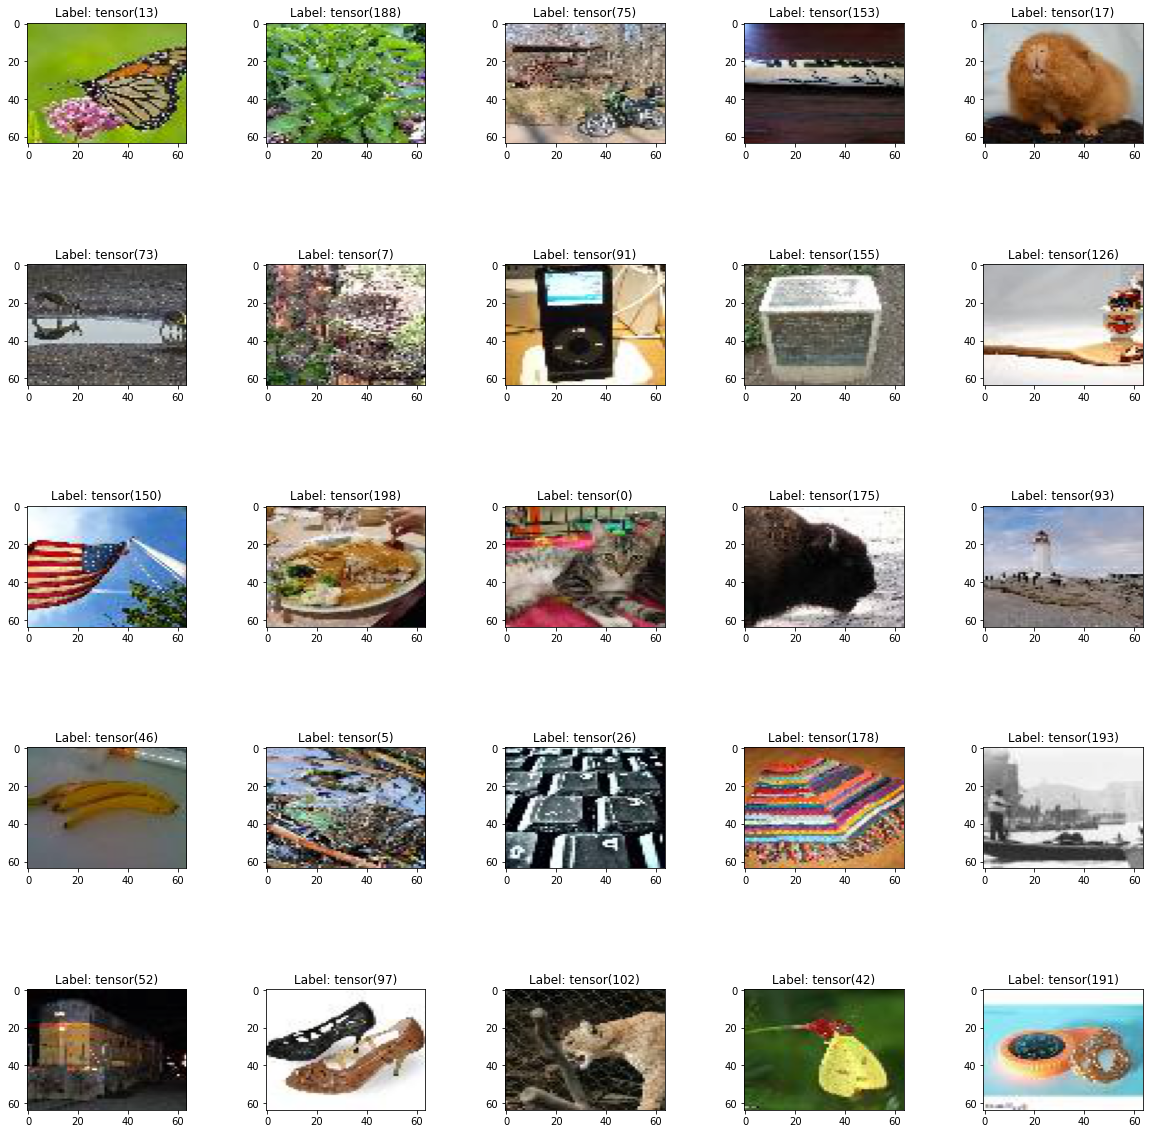

In [27]:
Display_Sample_Image(mean, std, test_loader)

In [0]:
from models.ResNet18_for_64 import ResNet18
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
summary(model, input_size=(3, 64, 64))

In [0]:
from Model_Train import train
from Model_Test import test

from torch.optim.lr_scheduler import ReduceLROnPlateau
#from OneCycle import OneCycle
import time

#Epochs = 10
lr = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay = 1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode="min", factor=0.1, patience=3, verbose=True, min_lr=1e-5)

def run( epoch,l1_decay=0, l2_decay=0, ):
  #l1_decay = 2e-05
  #l2_decay = 0.002
  
  Epochs = epoch
  test_losses = []
  test_accs = []
  train_losses = []
  train_accs = []
  #misclassified_imgs = []
  #correct_imgs = []
  #use_cycle = True
  print("\n")
  for epoch in range(Epochs):
      t0=time.time()
      print("EPOCH:", epoch+1)
      

      train(model, device,train_loader, criterion, optimizer, epoch, l1_decay,l2_decay)
      test(model, device, test_loader, criterion)

      #scheduler.step(test_losses[-1])
      t1= time.time()
      print("Time taken in epoch {} is {:.2f} Seconds\n".format(epoch+1, (t1-t0)))

#run(l1_decay=2e-05, l2_decay= 0.002)

In [30]:
run(l1_decay=2e-05, l2_decay= 0.002)

  0%|          | 0/602 [00:00<?, ?it/s]



EPOCH: 1


L2_loss=197.97406005859375 L1_loss=20814.82421875 Loss=4.731871128082275 Batch_id=601 Accuracy=18.12: 100%|██████████| 602/602 [01:10<00:00,  8.58it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0326, Accuracy: 4755/33000 (14.41%)

Time taken in epoch 1 is 78.02 Seconds

EPOCH: 2


L2_loss=202.3942108154297 L1_loss=20920.73046875 Loss=4.602628231048584 Batch_id=601 Accuracy=18.78: 100%|██████████| 602/602 [01:09<00:00,  8.61it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0302, Accuracy: 5349/33000 (16.21%)

Time taken in epoch 2 is 77.73 Seconds

EPOCH: 3


L2_loss=205.90435791015625 L1_loss=21010.9921875 Loss=4.494532585144043 Batch_id=601 Accuracy=19.00: 100%|██████████| 602/602 [01:10<00:00,  8.60it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0316, Accuracy: 4712/33000 (14.28%)

Time taken in epoch 3 is 77.96 Seconds

EPOCH: 4


L2_loss=209.7851104736328 L1_loss=21105.275390625 Loss=4.631394863128662 Batch_id=601 Accuracy=19.43: 100%|██████████| 602/602 [01:10<00:00,  8.57it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0305, Accuracy: 5350/33000 (16.21%)

Time taken in epoch 4 is 77.98 Seconds

EPOCH: 5


L2_loss=213.10826110839844 L1_loss=21277.73828125 Loss=4.465292453765869 Batch_id=601 Accuracy=19.85: 100%|██████████| 602/602 [01:09<00:00,  8.64it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0314, Accuracy: 5509/33000 (16.69%)

Time taken in epoch 5 is 77.51 Seconds

EPOCH: 6


L2_loss=216.4786376953125 L1_loss=21449.8515625 Loss=4.651202201843262 Batch_id=601 Accuracy=20.08: 100%|██████████| 602/602 [01:09<00:00,  8.62it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0299, Accuracy: 5386/33000 (16.32%)

Time taken in epoch 6 is 77.62 Seconds

EPOCH: 7


L2_loss=220.07806396484375 L1_loss=21685.65625 Loss=4.52122688293457 Batch_id=601 Accuracy=20.36: 100%|██████████| 602/602 [01:10<00:00,  8.60it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0312, Accuracy: 5176/33000 (15.68%)

Time taken in epoch 7 is 77.96 Seconds

EPOCH: 8


L2_loss=221.94650268554688 L1_loss=21833.330078125 Loss=4.41871976852417 Batch_id=601 Accuracy=20.70: 100%|██████████| 602/602 [01:09<00:00,  8.61it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0293, Accuracy: 6018/33000 (18.24%)

Time taken in epoch 8 is 77.70 Seconds

EPOCH: 9


L2_loss=225.28826904296875 L1_loss=22032.443359375 Loss=4.568284034729004 Batch_id=601 Accuracy=21.20: 100%|██████████| 602/602 [01:09<00:00,  8.62it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0294, Accuracy: 6170/33000 (18.70%)

Time taken in epoch 9 is 77.43 Seconds

EPOCH: 10


L2_loss=226.81951904296875 L1_loss=22074.19921875 Loss=4.57742977142334 Batch_id=601 Accuracy=21.39: 100%|██████████| 602/602 [01:08<00:00,  8.85it/s]


Test set: Average loss: 0.0298, Accuracy: 5982/33000 (18.13%)

Time taken in epoch 10 is 75.74 Seconds



In [31]:
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay = 1e-5)
run(l1_decay=0, l2_decay= 0)

  0%|          | 0/602 [00:00<?, ?it/s]



EPOCH: 1


Loss=3.6223230361938477 Batch_id=601 Accuracy=22.74: 100%|██████████| 602/602 [01:05<00:00,  9.19it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0289, Accuracy: 6649/33000 (20.15%)

Time taken in epoch 1 is 74.01 Seconds

EPOCH: 2


Loss=3.291735887527466 Batch_id=601 Accuracy=24.92: 100%|██████████| 602/602 [01:02<00:00,  9.60it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0289, Accuracy: 6647/33000 (20.14%)

Time taken in epoch 2 is 70.40 Seconds

EPOCH: 3


Loss=3.0552926063537598 Batch_id=601 Accuracy=26.72: 100%|██████████| 602/602 [01:02<00:00,  9.64it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0271, Accuracy: 7561/33000 (22.91%)

Time taken in epoch 3 is 70.25 Seconds

EPOCH: 4


Loss=3.4824063777923584 Batch_id=601 Accuracy=27.85: 100%|██████████| 602/602 [01:02<00:00,  9.67it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0258, Accuracy: 8608/33000 (26.08%)

Time taken in epoch 4 is 70.03 Seconds

EPOCH: 5


Loss=2.6062521934509277 Batch_id=601 Accuracy=28.85: 100%|██████████| 602/602 [01:01<00:00,  9.78it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0258, Accuracy: 8687/33000 (26.32%)

Time taken in epoch 5 is 69.41 Seconds

EPOCH: 6


Loss=2.660580635070801 Batch_id=601 Accuracy=29.66: 100%|██████████| 602/602 [01:01<00:00,  9.76it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0268, Accuracy: 8216/33000 (24.90%)

Time taken in epoch 6 is 69.25 Seconds

EPOCH: 7


Loss=3.135561943054199 Batch_id=601 Accuracy=30.47: 100%|██████████| 602/602 [01:00<00:00,  9.90it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0252, Accuracy: 8943/33000 (27.10%)

Time taken in epoch 7 is 68.54 Seconds

EPOCH: 8


Loss=2.6528420448303223 Batch_id=601 Accuracy=31.22: 100%|██████████| 602/602 [01:00<00:00,  9.89it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0261, Accuracy: 8678/33000 (26.30%)

Time taken in epoch 8 is 68.58 Seconds

EPOCH: 9


Loss=3.0507707595825195 Batch_id=601 Accuracy=31.74: 100%|██████████| 602/602 [01:01<00:00,  9.81it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0255, Accuracy: 9089/33000 (27.54%)

Time taken in epoch 9 is 68.91 Seconds

EPOCH: 10


Loss=2.9111132621765137 Batch_id=601 Accuracy=32.39: 100%|██████████| 602/602 [01:01<00:00,  9.82it/s]


Test set: Average loss: 0.0256, Accuracy: 9093/33000 (27.55%)

Time taken in epoch 10 is 68.93 Seconds



In [34]:
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
run(l1_decay=0, l2_decay= 0)

  0%|          | 0/602 [00:00<?, ?it/s]



EPOCH: 1


Loss=3.123431444168091 Batch_id=601 Accuracy=32.74: 100%|██████████| 602/602 [01:02<00:00,  9.57it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0238, Accuracy: 10139/33000 (30.72%)

Time taken in epoch 1 is 70.69 Seconds

EPOCH: 2


Loss=2.9840381145477295 Batch_id=601 Accuracy=33.79: 100%|██████████| 602/602 [01:02<00:00,  9.58it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0264, Accuracy: 8705/33000 (26.38%)

Time taken in epoch 2 is 70.76 Seconds

EPOCH: 3


Loss=2.8013410568237305 Batch_id=601 Accuracy=34.09: 100%|██████████| 602/602 [01:02<00:00,  9.61it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0254, Accuracy: 9080/33000 (27.52%)

Time taken in epoch 3 is 70.58 Seconds

EPOCH: 4


Loss=2.8722879886627197 Batch_id=601 Accuracy=34.71: 100%|██████████| 602/602 [01:02<00:00,  9.66it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0249, Accuracy: 9570/33000 (29.00%)

Time taken in epoch 4 is 70.29 Seconds

EPOCH: 5


Loss=2.894453763961792 Batch_id=601 Accuracy=35.10: 100%|██████████| 602/602 [01:01<00:00,  9.72it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0257, Accuracy: 9292/33000 (28.16%)

Time taken in epoch 5 is 69.67 Seconds

EPOCH: 6


Loss=2.8161630630493164 Batch_id=601 Accuracy=35.79: 100%|██████████| 602/602 [01:02<00:00,  9.69it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0254, Accuracy: 9431/33000 (28.58%)

Time taken in epoch 6 is 69.88 Seconds

EPOCH: 7


Loss=3.2470712661743164 Batch_id=601 Accuracy=35.86: 100%|██████████| 602/602 [01:02<00:00,  9.70it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0255, Accuracy: 9372/33000 (28.40%)

Time taken in epoch 7 is 69.92 Seconds

EPOCH: 8


Loss=2.7575371265411377 Batch_id=601 Accuracy=36.24: 100%|██████████| 602/602 [01:02<00:00,  9.63it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0260, Accuracy: 9276/33000 (28.11%)

Time taken in epoch 8 is 70.33 Seconds

EPOCH: 9


Loss=2.4933481216430664 Batch_id=601 Accuracy=36.61: 100%|██████████| 602/602 [01:02<00:00,  9.66it/s]
  0%|          | 0/602 [00:00<?, ?it/s]

Test set: Average loss: 0.0241, Accuracy: 10287/33000 (31.17%)

Time taken in epoch 9 is 70.05 Seconds

EPOCH: 10


Loss=2.8536391258239746 Batch_id=601 Accuracy=37.32: 100%|██████████| 602/602 [01:02<00:00,  9.68it/s]


Test set: Average loss: 0.0250, Accuracy: 9800/33000 (29.70%)

Time taken in epoch 10 is 69.88 Seconds



Change: Batch Size-512
Epochs=6, no CutOUT

> Indented block



In [41]:

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay = 1e-4)
run(epoch =6, l1_decay=2e-05, l2_decay= 0.002)

  0%|          | 0/151 [00:00<?, ?it/s]



EPOCH: 1


L2_loss=650.4521484375 L1_loss=76884.5625 Loss=5.129580020904541 Batch_id=150 Accuracy=42.87: 100%|██████████| 151/151 [00:42<00:00,  3.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0057, Accuracy: 11400/33000 (34.55%)

Time taken in epoch 1 is 49.70 Seconds

EPOCH: 2


L2_loss=621.9122924804688 L1_loss=72895.2265625 Loss=5.0792717933654785 Batch_id=150 Accuracy=44.13: 100%|██████████| 151/151 [00:43<00:00,  3.49it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 10976/33000 (33.26%)

Time taken in epoch 2 is 50.54 Seconds

EPOCH: 3


L2_loss=594.6708374023438 L1_loss=69153.0078125 Loss=4.854920387268066 Batch_id=150 Accuracy=44.29: 100%|██████████| 151/151 [00:43<00:00,  3.47it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 10751/33000 (32.58%)

Time taken in epoch 3 is 50.77 Seconds

EPOCH: 4


L2_loss=568.8823852539062 L1_loss=65635.1875 Loss=4.843333721160889 Batch_id=150 Accuracy=44.87: 100%|██████████| 151/151 [00:43<00:00,  3.46it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0058, Accuracy: 11173/33000 (33.86%)

Time taken in epoch 4 is 50.91 Seconds

EPOCH: 5


L2_loss=544.3099365234375 L1_loss=62322.2734375 Loss=4.63960599899292 Batch_id=150 Accuracy=44.82: 100%|██████████| 151/151 [00:43<00:00,  3.47it/s]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 11971/33000 (36.28%)

Time taken in epoch 5 is 50.65 Seconds

EPOCH: 6


L2_loss=520.73828125 L1_loss=59220.265625 Loss=4.302636623382568 Batch_id=150 Accuracy=44.71: 100%|██████████| 151/151 [00:43<00:00,  3.47it/s]


Test set: Average loss: 0.0056, Accuracy: 11593/33000 (35.13%)

Time taken in epoch 6 is 50.70 Seconds






Change: Batch Size-512 Epochs=6, no CutOUT,
LR: 0.01

> Indented block



  




In [51]:

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay = 1e-4)
run(epoch =4, l1_decay=2e-05, l2_decay= 0.002)

  0%|          | 0/76 [00:00<?, ?it/s]



EPOCH: 1


L2_loss=519.4393310546875 L1_loss=59020.16015625 Loss=4.572841644287109 Batch_id=75 Accuracy=46.62: 100%|██████████| 76/76 [00:39<00:00,  1.90it/s]
  0%|          | 0/76 [00:00<?, ?it/s]

Test set: Average loss: 0.0028, Accuracy: 11862/33000 (35.95%)

Time taken in epoch 1 is 47.41 Seconds

EPOCH: 2


L2_loss=518.142578125 L1_loss=58828.37109375 Loss=4.434617042541504 Batch_id=75 Accuracy=47.15: 100%|██████████| 76/76 [00:40<00:00,  1.89it/s]
  0%|          | 0/76 [00:00<?, ?it/s]

Test set: Average loss: 0.0028, Accuracy: 11792/33000 (35.73%)

Time taken in epoch 2 is 47.61 Seconds

EPOCH: 3


L2_loss=516.8471069335938 L1_loss=58640.25390625 Loss=4.304716110229492 Batch_id=75 Accuracy=47.48: 100%|██████████| 76/76 [00:41<00:00,  1.85it/s]
  0%|          | 0/76 [00:00<?, ?it/s]

Test set: Average loss: 0.0028, Accuracy: 11788/33000 (35.72%)

Time taken in epoch 3 is 48.51 Seconds

EPOCH: 4


L2_loss=515.5653076171875 L1_loss=58458.17578125 Loss=4.253812313079834 Batch_id=75 Accuracy=47.31: 100%|██████████| 76/76 [00:40<00:00,  1.85it/s]


Test set: Average loss: 0.0028, Accuracy: 11852/33000 (35.92%)

Time taken in epoch 4 is 48.27 Seconds



In [0]:
torch.save(model.state_dict(), 'Assign_12.pt')

In [0]:
#new_model = model()
#new_model.laod_state_dict(torch.load('Assign_12.pt'))
#new_model.eval()